In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
df.drop('ID',axis=1,inplace=True)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
# checking shape of the dataset
df.shape

(31647, 17)

In [6]:
# checking null values
df.isnull().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


Two types of data types are present  here int64 and object.

In [8]:
# statistical summary of numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
#checkinh number of unique values in every column
for column in df.columns:
    print(column,df[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 6326
housing 2
loan 2
contact 3
day 31
month 12
duration 1454
campaign 45
pdays 509
previous 38
poutcome 4
subscribed 2


In [10]:
# checking name of unique values in categorical columns
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital
['married' 'divorced' 'single']
education
['unknown' 'secondary' 'tertiary' 'primary']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular' 'unknown']
month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome
['unknown' 'success' 'failure' 'other']
subscribed
['no' 'yes']


In [11]:
categorical_col = [col for col in df.columns if((df[col].dtypes=='object') & (col not in ['subscribed']))]
categorical_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

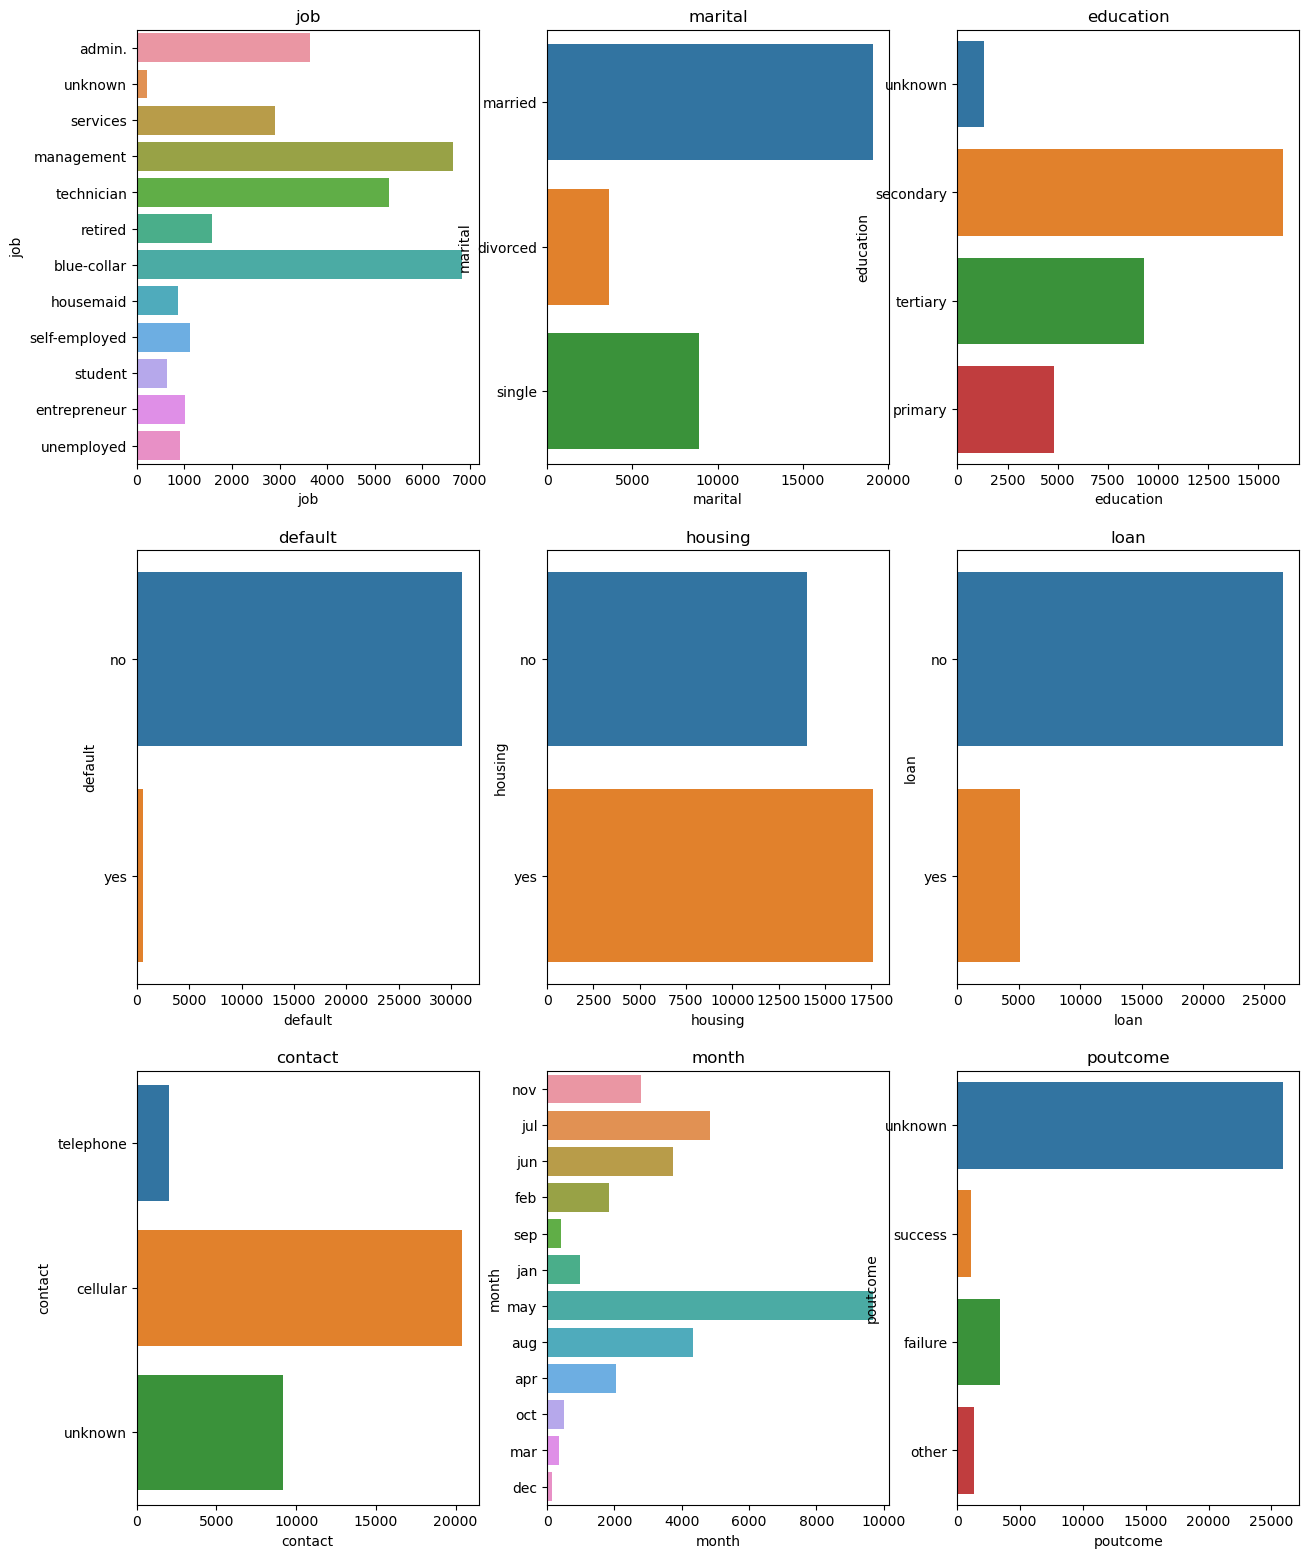

In [12]:
# univariate analysis of categorical features
plt.figure(figsize=(15,80),facecolor='white')
plotnumber=1
for categorical_co in categorical_col:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_co,data=df)
    plt.xlabel(categorical_co)
    plt.title(categorical_co)
    plotnumber+=1
plt.show()
    

client with job type as management and blue-coller records are high in given dataset and housemaid are very less.

client who married are high in records in the dataset and divorced are less.

client whoes education background is secondary are in high numbers in given dataset

client who have been contacted via cellular are high in numbers.

data in month of may is high and less in december

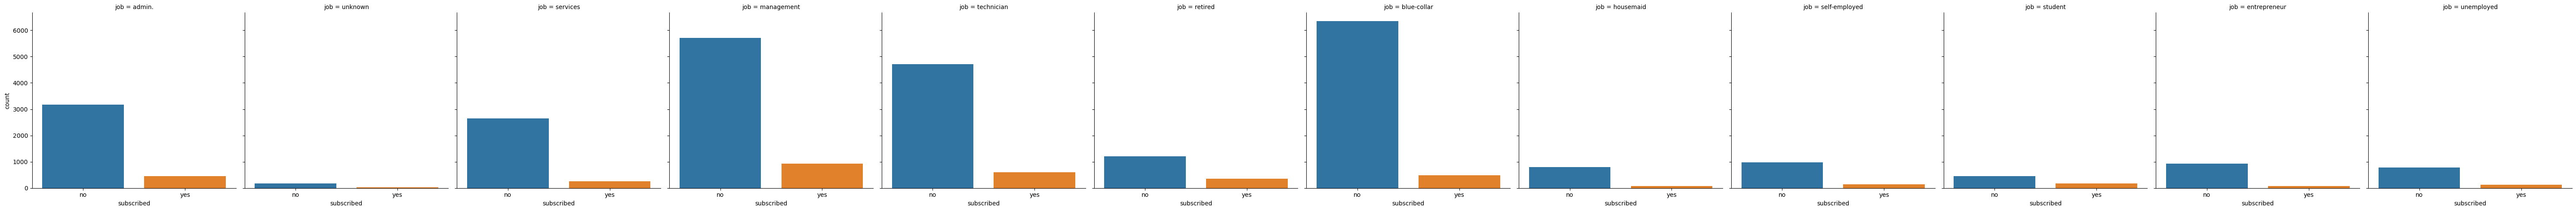

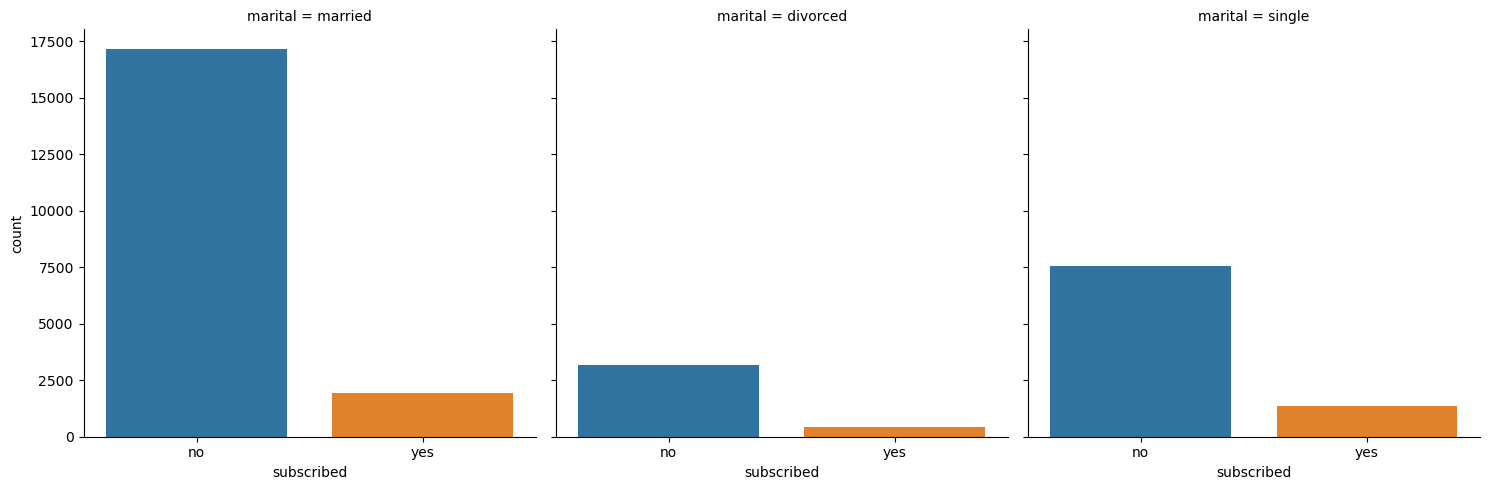

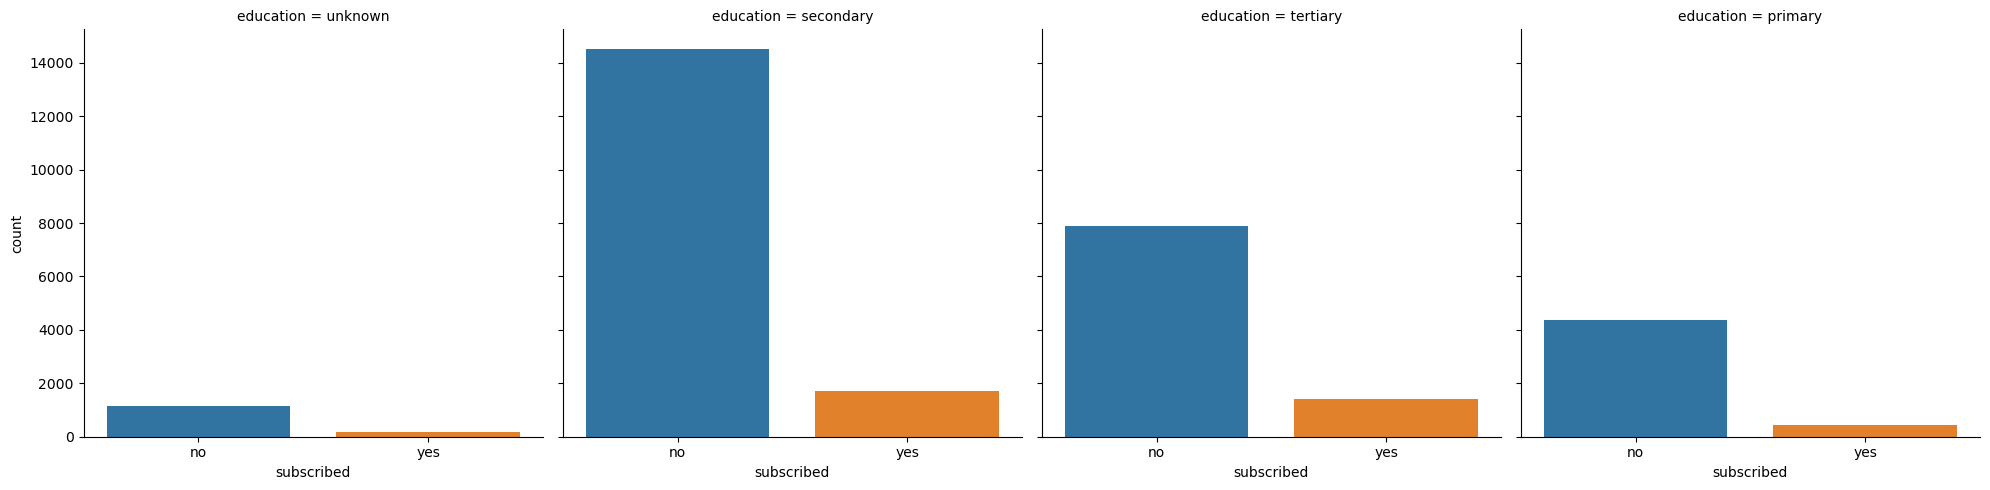

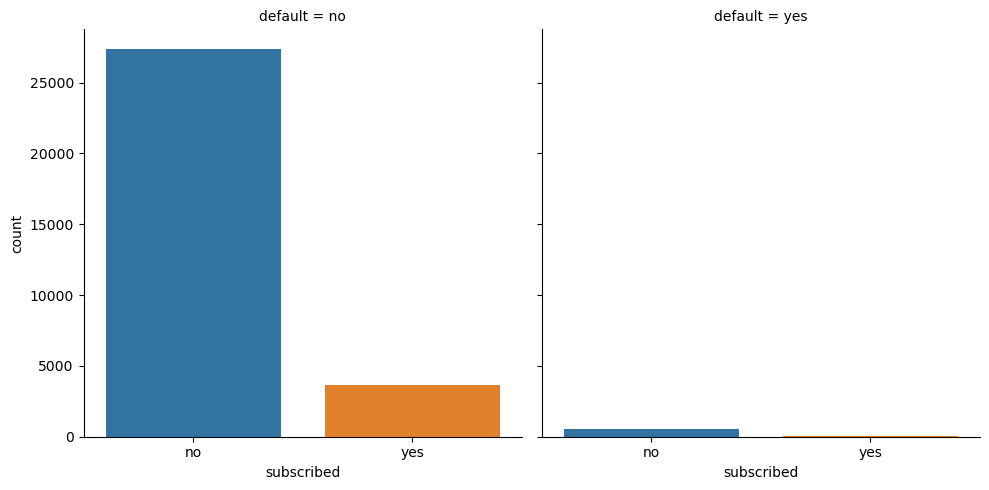

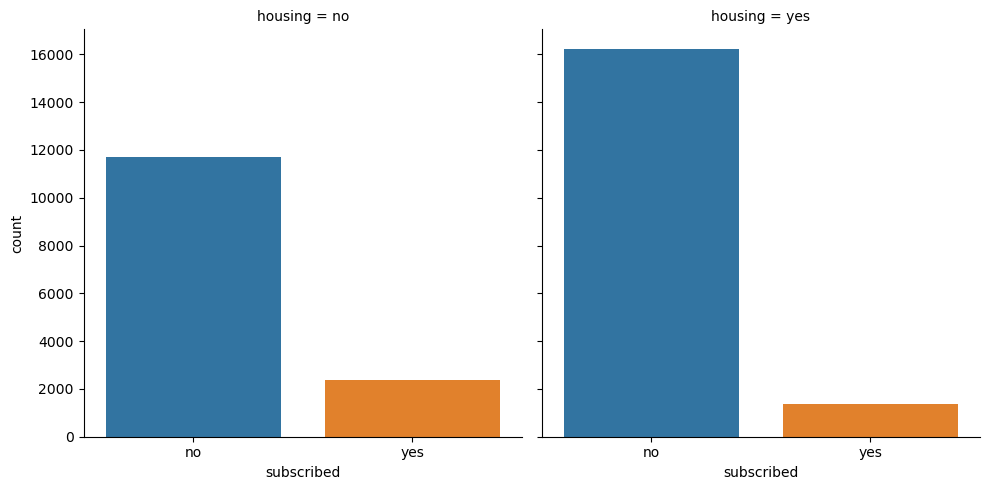

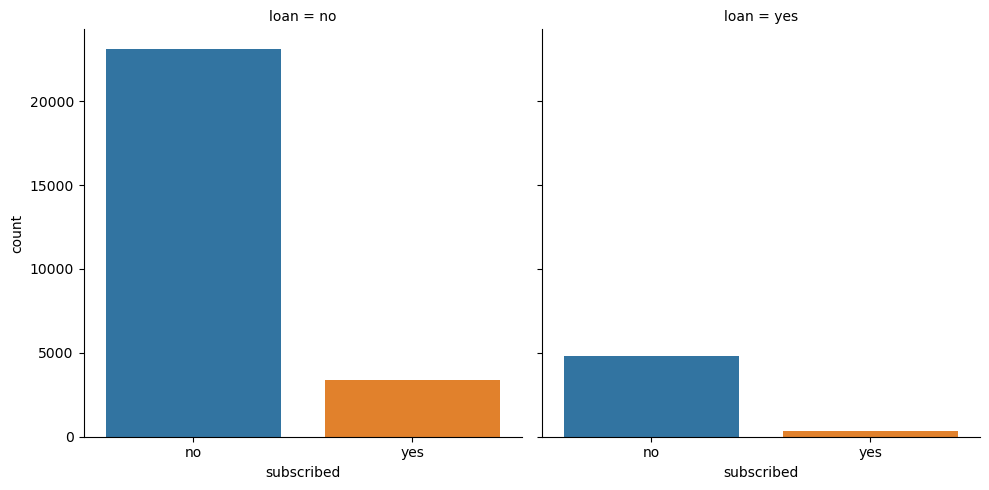

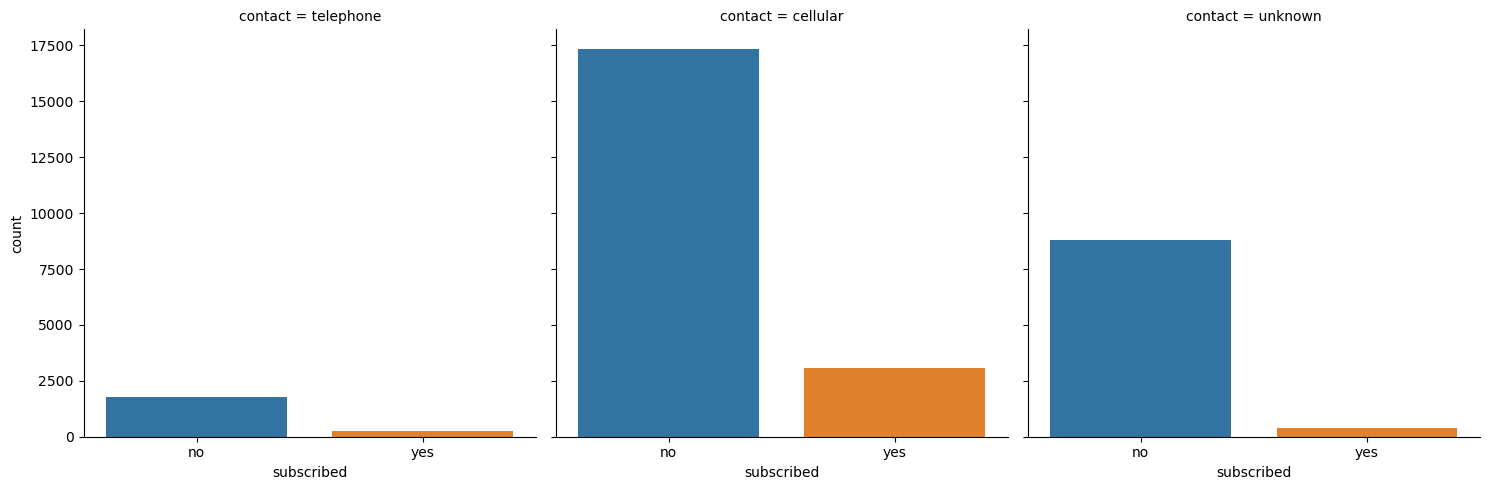

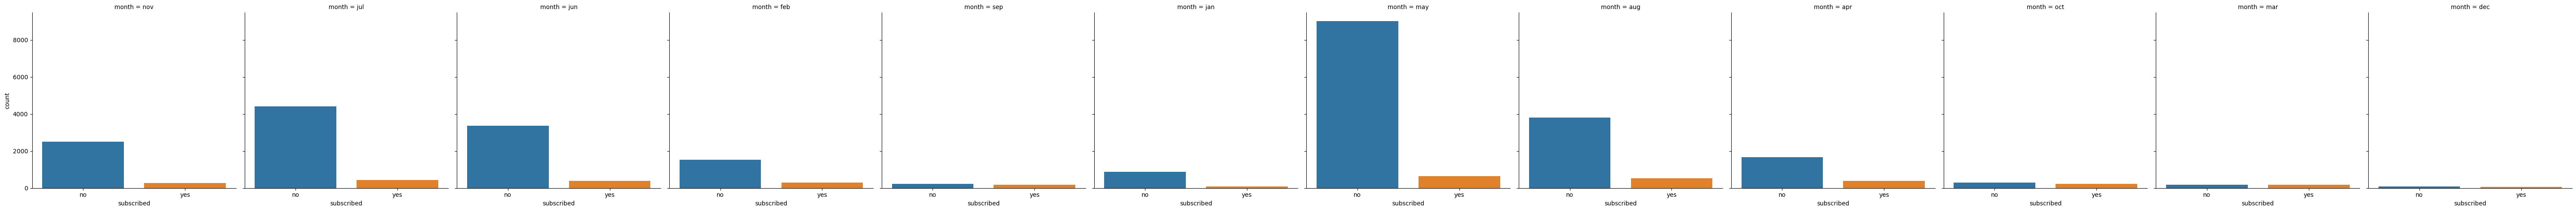

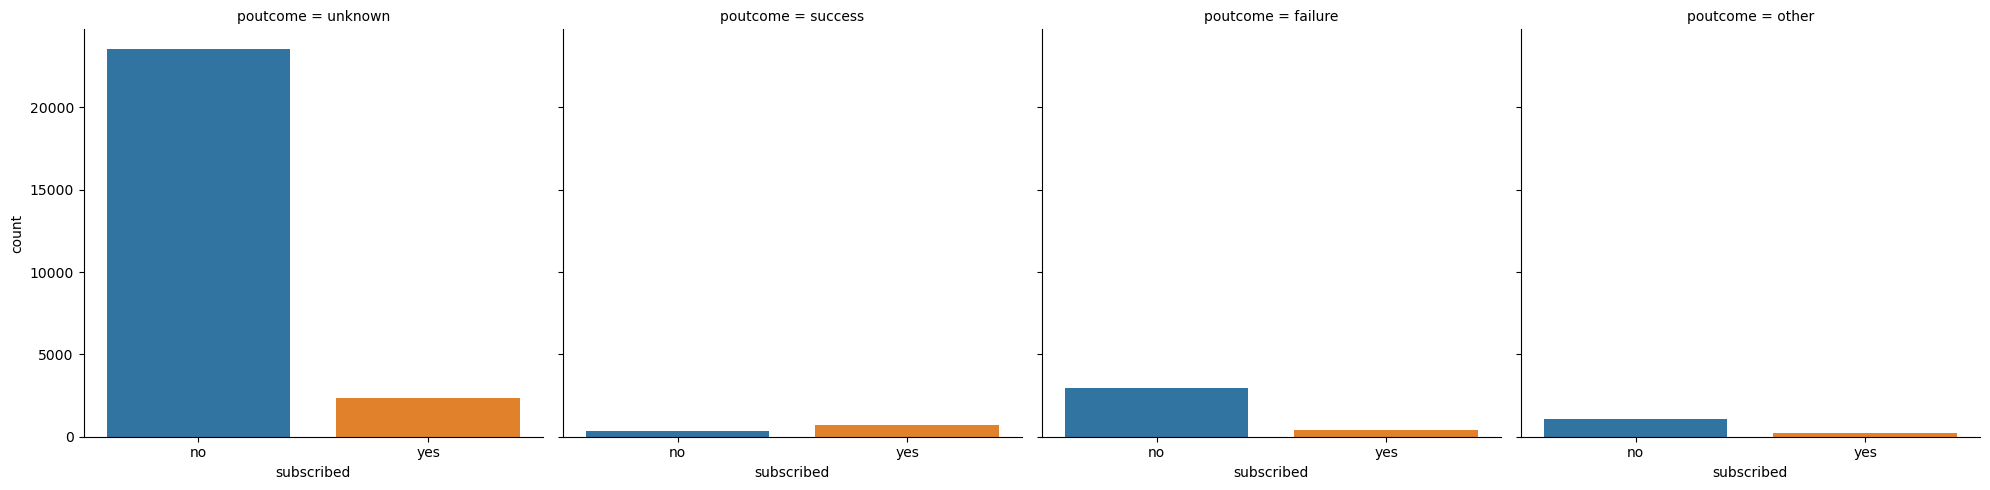

In [13]:
# Relationship between Categorical Features and Label
for i in categorical_col:
    sns.catplot(x='subscribed', col=i, kind='count', data= df)
plt.show()

Retired client has high interest on subcription.

client who has housing loan seems to be not interested much on supcription

if pre campagin outcome that is poutcome-success then, there is high chance of client to show interest on subcription

in month of March, September, October and December, client show high interest to subcription

in month of may, records are high but client interst ratio is very less


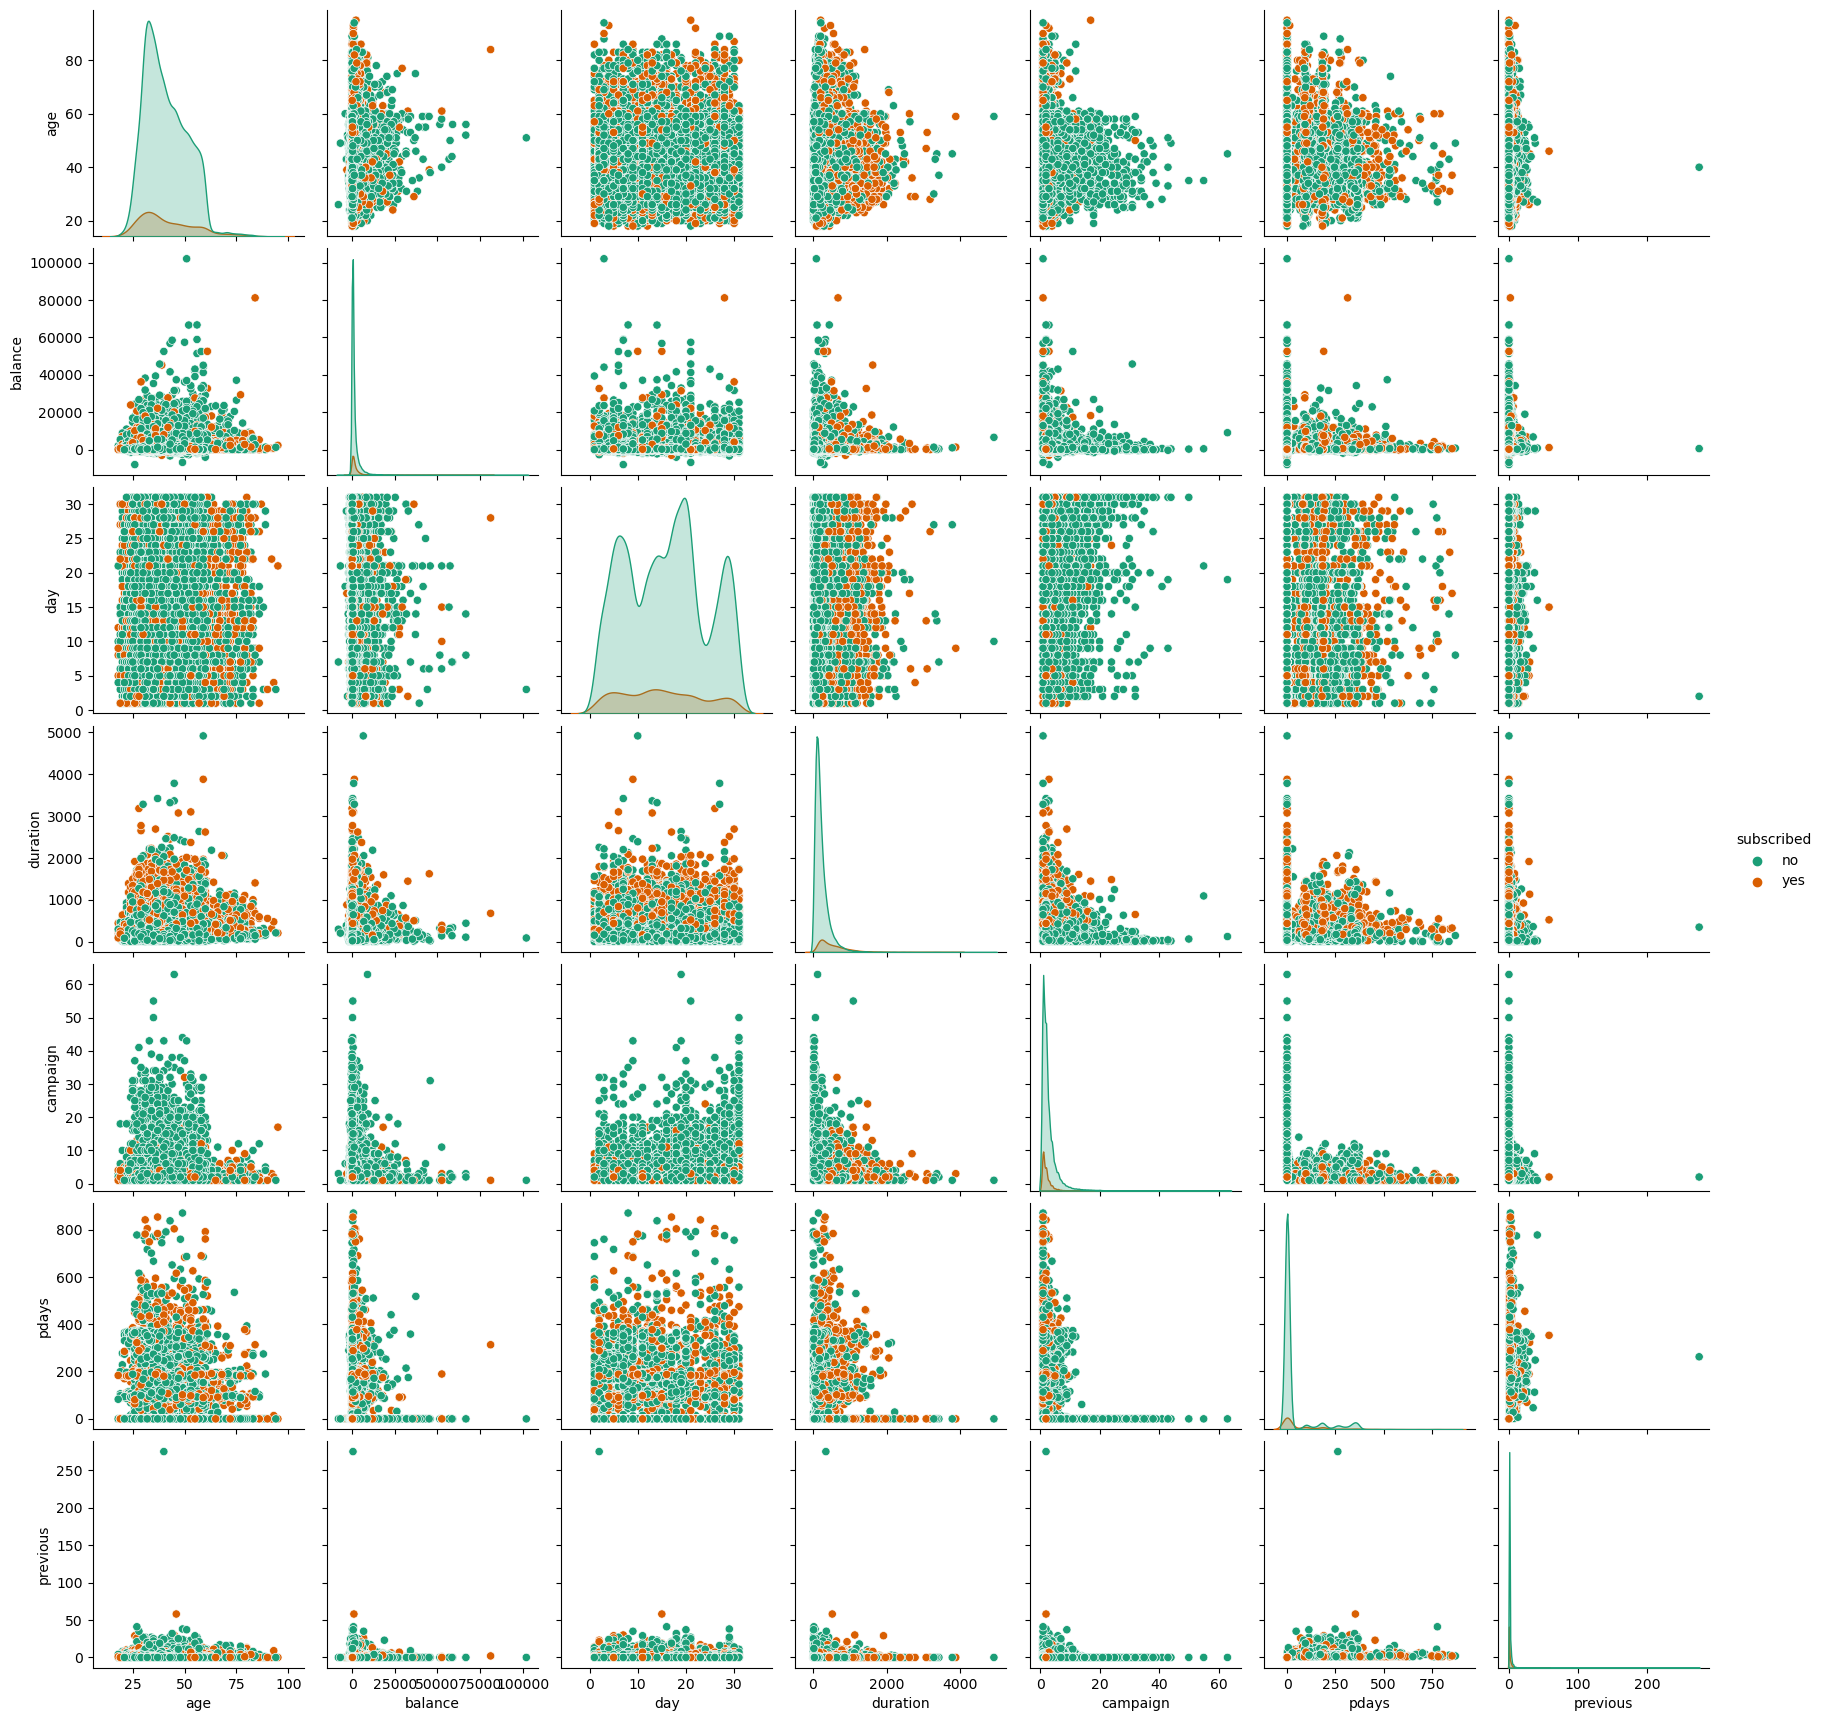

In [14]:
sns.pairplot(df,hue ='subscribed',palette= "Dark2")
plt.show()

In [15]:
numerical_col = df.select_dtypes(exclude=['object']).columns
numerical_col

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

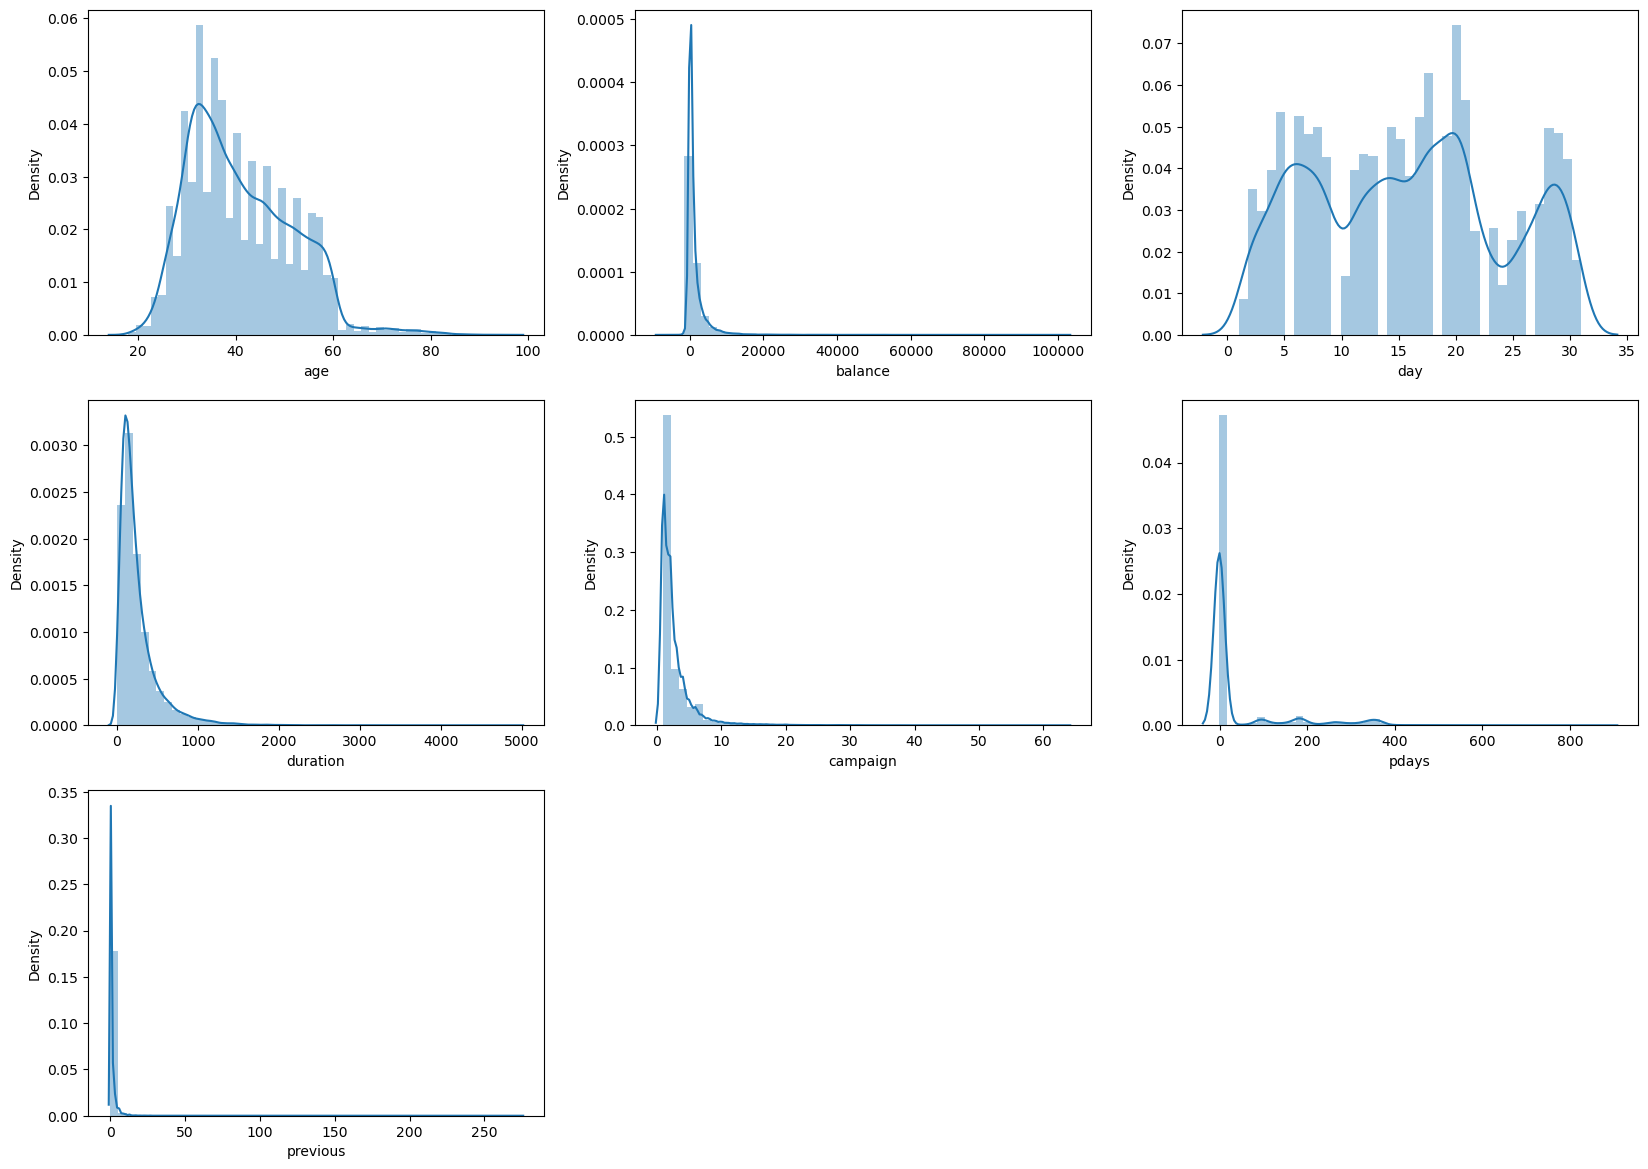

In [16]:
# univariate analysis of numerical features
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for i in numerical_col:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()
   

Here days and age are distributed normally.

durationm campaign, pdays, previous and balance are seem to have outliers and skewed to the left.

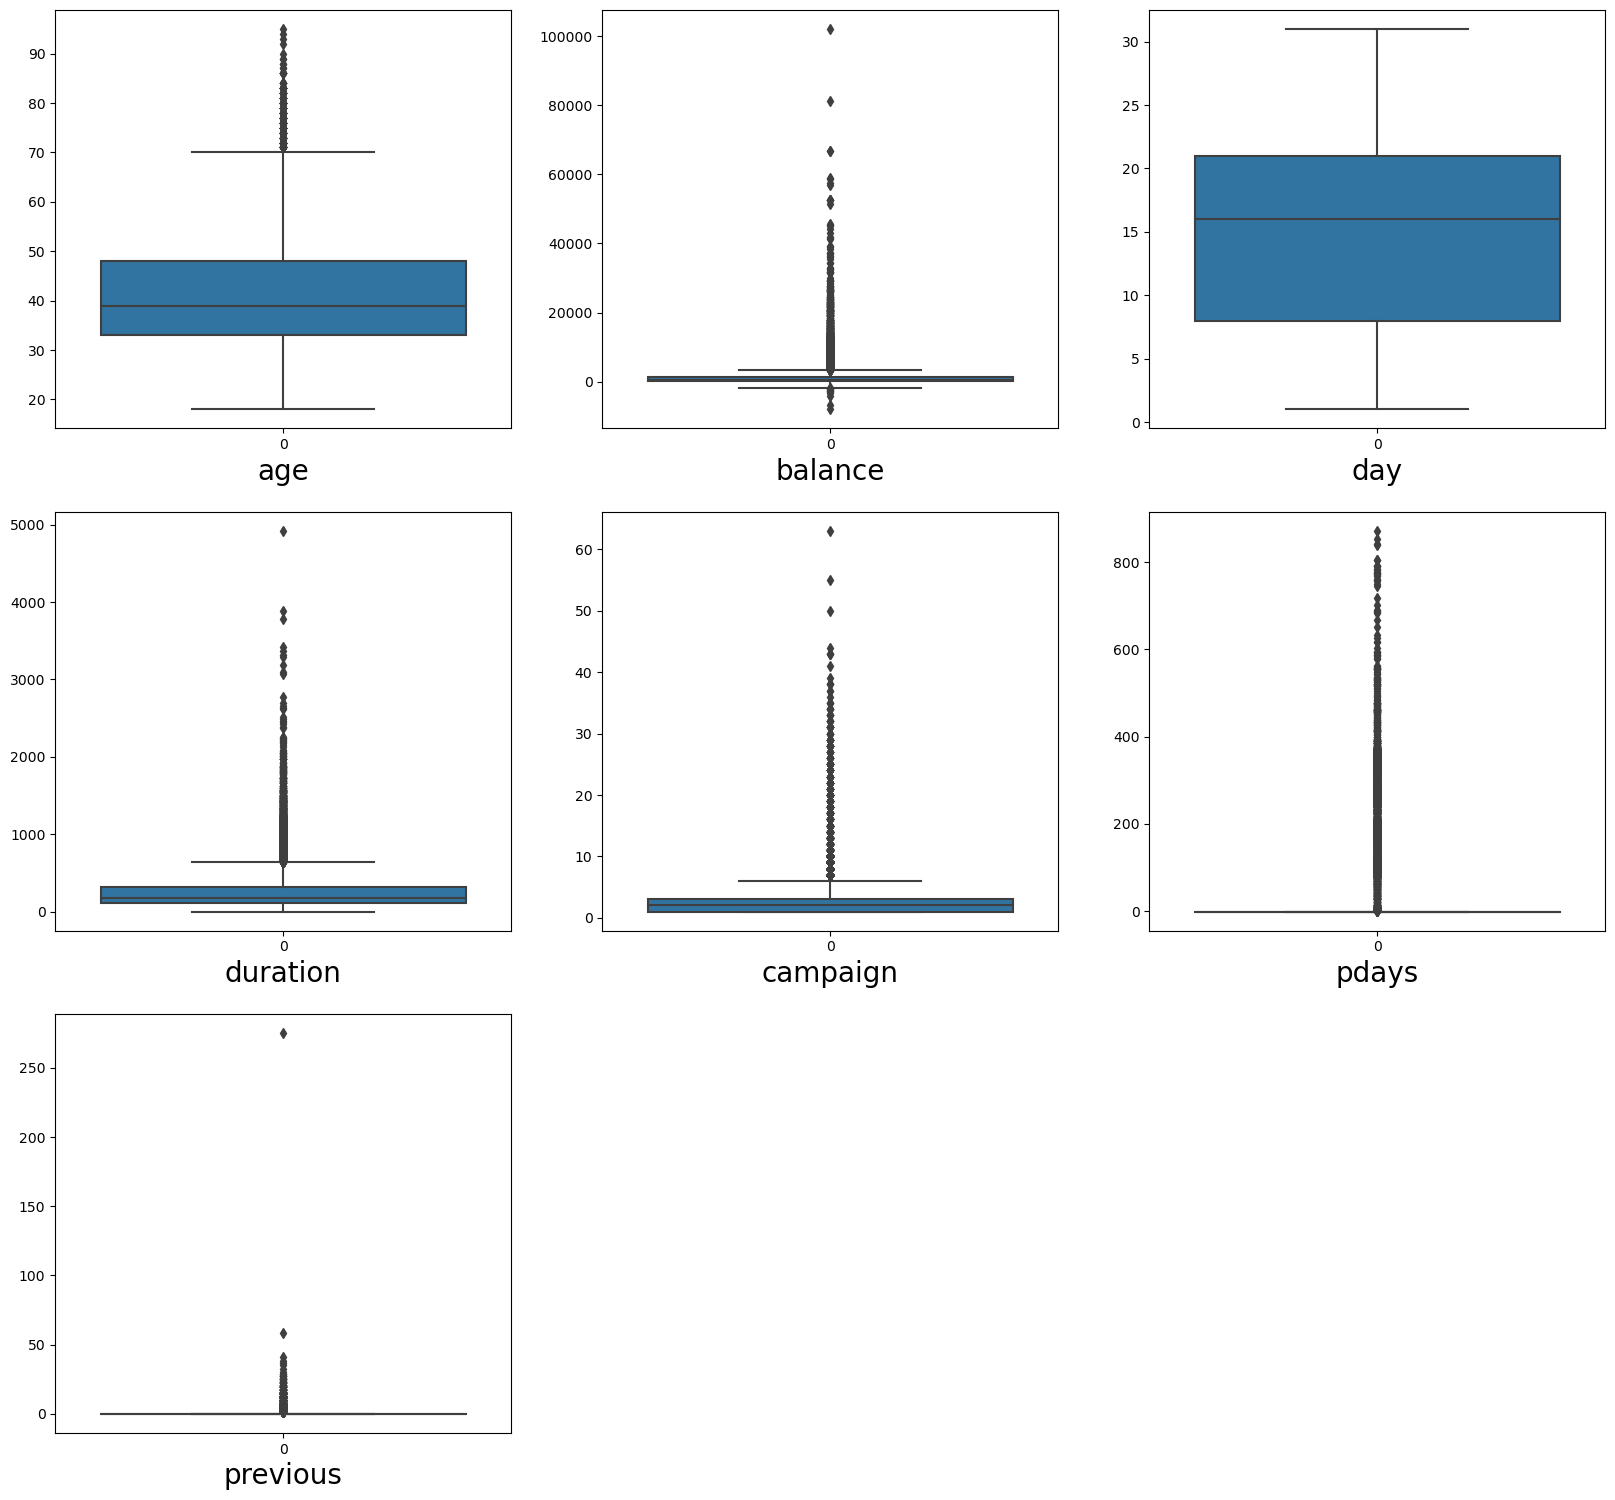

In [17]:
# Visualizing the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

for column in numerical_col:
    if graph<=13: 
        plt.subplot (4,3,graph) 
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=20)
    
    graph+=1
plt.show()

Age, balance, duration, campaign, pdays and previous have outliers.

We will remove outliers from duration, campaign, pdays and previous using zscore or IQR as age and balance need not remove outliers because their values are practically possible.

In [18]:
from scipy.stats import zscore

out_col = df[['duration','campaign','pdays','previous']]
z = np.abs(zscore(out_col))
np.where(z>3)

(array([   21,    36,    50, ..., 31622, 31645, 31646], dtype=int64),
 array([1, 2, 2, ..., 2, 3, 0], dtype=int64))

In [19]:
df.shape

(31647, 17)

In [20]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(28859, 17)

In [21]:
print("Data Loss Percentage After removing outliers with IQR method-", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage After removing outliers with IQR method- 8.809681802382533


In [22]:
Q1=out_col.quantile (0.25)

Q3=out_col.quantile (0.75)

IQR=Q3- Q1

df2=df[~((df< (Q1-1.5 *IQR)) | (df> (Q3 + 1.5* IQR))).any (axis=1)]

In [23]:
df2.shape

(22135, 17)

In [24]:
print("Data Loss Percentage After removing outliers with IQR method-", ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage After removing outliers with IQR method- 30.05656144342276


As data loss percentage is lesser with Zscore method. So we will assign df1 to df.

In [25]:
df=df1

In [45]:
dfr = df.copy()

In [46]:
dfr.skew()

age         0.667717
balance     8.056983
day         0.071817
duration    1.594808
campaign    0.265448
pdays       2.804390
previous    2.054562
dtype: float64

There is skewness present in the columns balance,duration, campaign pdays and previous. we need not remove skewness from balance and age because its practically possible and we ll try to remove skewness from the other 4.

In [47]:
skewed_columns = ['duration', 'pdays', 'previous']

for column in skewed_columns:
    dfr[column] = np.cbrt(dfr[column])

In [48]:
dfr.skew()

age         0.667717
balance     8.056983
day         0.071817
duration    0.311573
campaign    0.265448
pdays       2.226994
previous    2.054551
dtype: float64

In [50]:
skewed_columns = ['pdays', 'previous']

for column in skewed_columns:
    dfr[column] = np.sqrt(dfr[column])

In [51]:
dfr.skew()

age         0.667717
balance     8.056983
day         0.071817
duration    0.311573
campaign    0.265448
pdays       2.150908
previous    2.054548
dtype: float64

In [53]:
skewed_columns = ['pdays', 'previous']

for column in skewed_columns:
    dfr[column] = np.exp(dfr[column])

In [54]:
dfr.skew()

age         0.667717
balance     8.056983
day         0.071817
duration    0.311573
campaign    0.265448
pdays       2.318405
previous    2.054550
dtype: float64

In [56]:
skewed_columns = ['pdays', 'previous']

for column in skewed_columns:
    dfr[column] = np.log1p(dfr[column])

In [57]:
dfr.skew()

age         0.667717
balance     8.056983
day         0.071817
duration    0.311573
campaign    0.265448
pdays       2.167042
previous    2.054549
dtype: float64

In [59]:
from scipy.stats import yeojohnson

# Applying Yeo-Johnson transformation
skewed_columns = ['pdays','previous']

for column in skewed_columns:
    dfr[column], _ = yeojohnson(dfr[column] + 1)


In [60]:
dfr.skew()

age         0.667717
balance     8.056983
day         0.071817
duration    0.311573
campaign    0.265448
pdays       0.000000
previous    0.000000
dtype: float64

We have removed skewness completely.

In [65]:
df=dfr

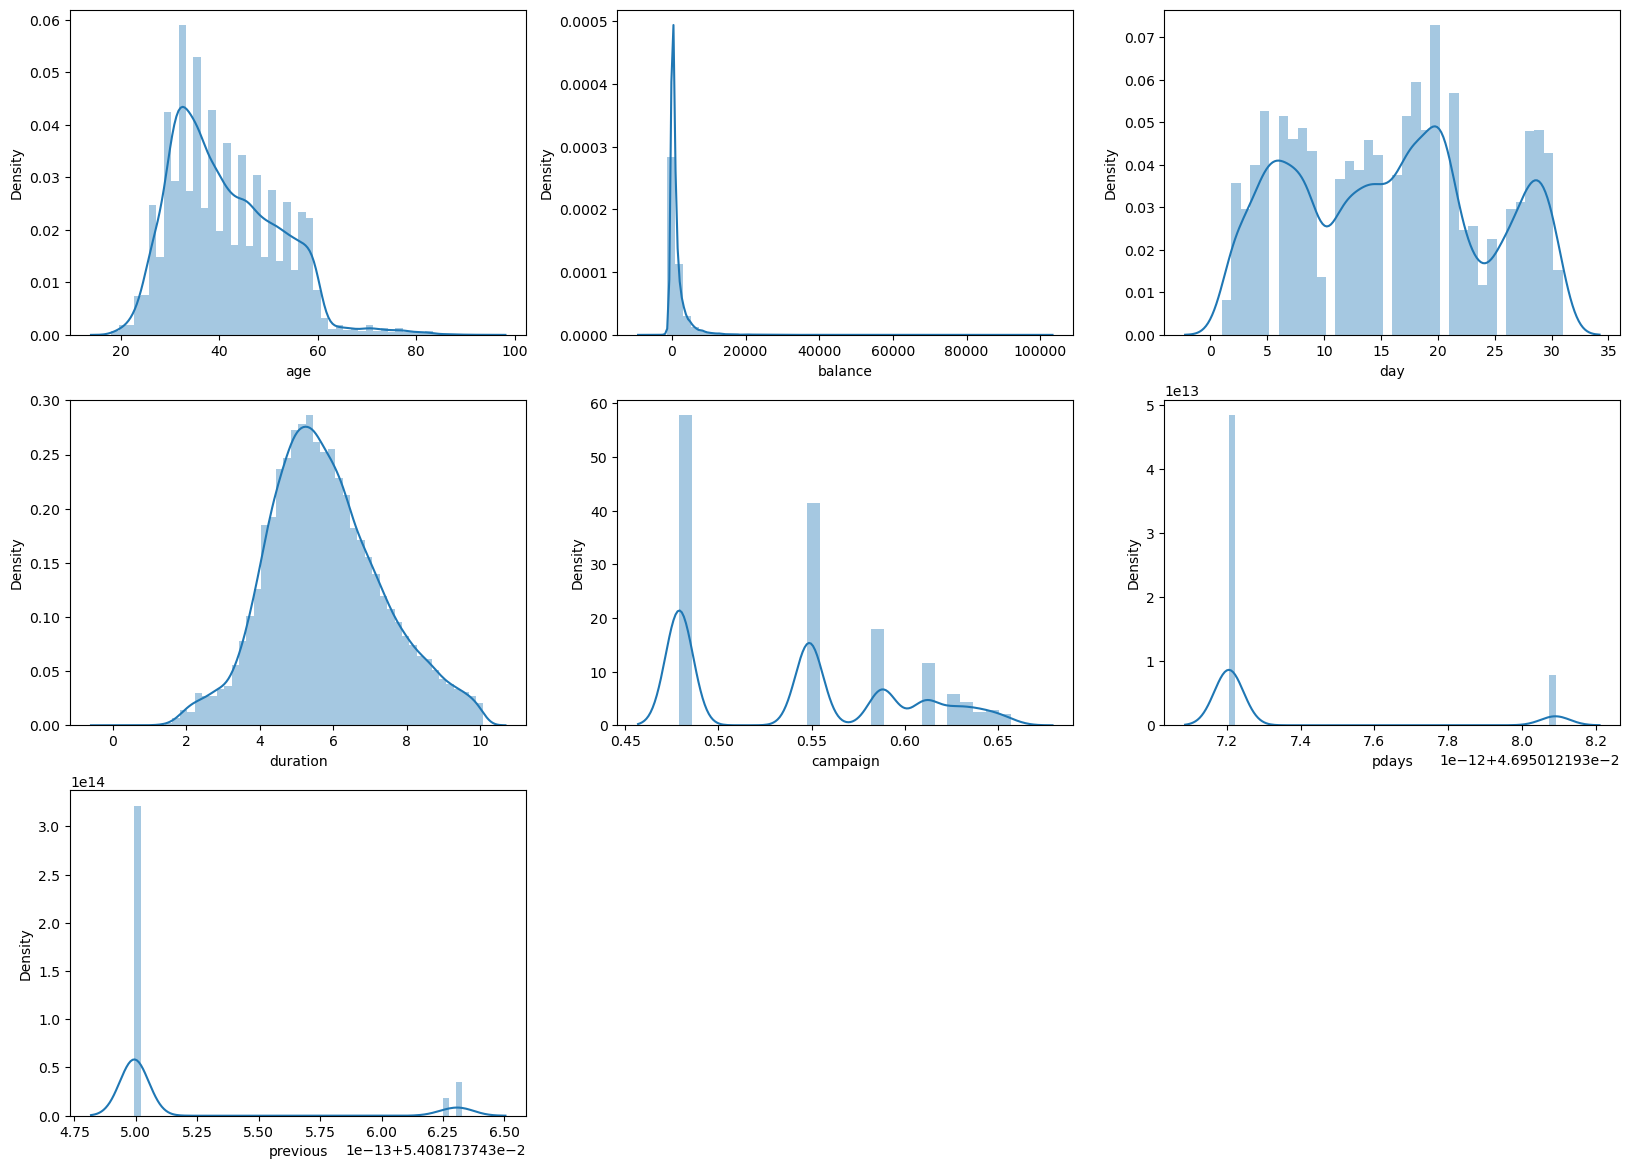

In [66]:
# checking again how the data looks now
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for i in numerical_col:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

we have successfully removed all the skewness from the data.

The data looks normal now.

In [67]:
# Encoding categorical columns using OrdinalEncoder 
from sklearn.preprocessing import OrdinalEncoder 
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform (df[i].values.reshape(-1, 1))
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,3.530348,0.548736,0.04695,0.054082,3.0,0.0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,4.497941,0.548736,0.04695,0.054082,3.0,0.0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,6.214465,0.479034,0.04695,0.054082,3.0,0.0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,9.535417,0.479034,0.04695,0.054082,2.0,1.0
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,7.243156,0.479034,0.04695,0.054082,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4.0,2.0,1.0,0.0,2968,0.0,0.0,2.0,20,6.0,3.107233,0.610964,0.04695,0.054082,3.0,0.0
31641,37,9.0,2.0,2.0,0.0,1309,0.0,0.0,2.0,6,6.0,7.617412,0.548736,0.04695,0.054082,3.0,0.0
31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,4.876999,0.548736,0.04695,0.054082,3.0,0.0
31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,7.594363,0.548736,0.04695,0.054082,3.0,1.0


<Axes: >

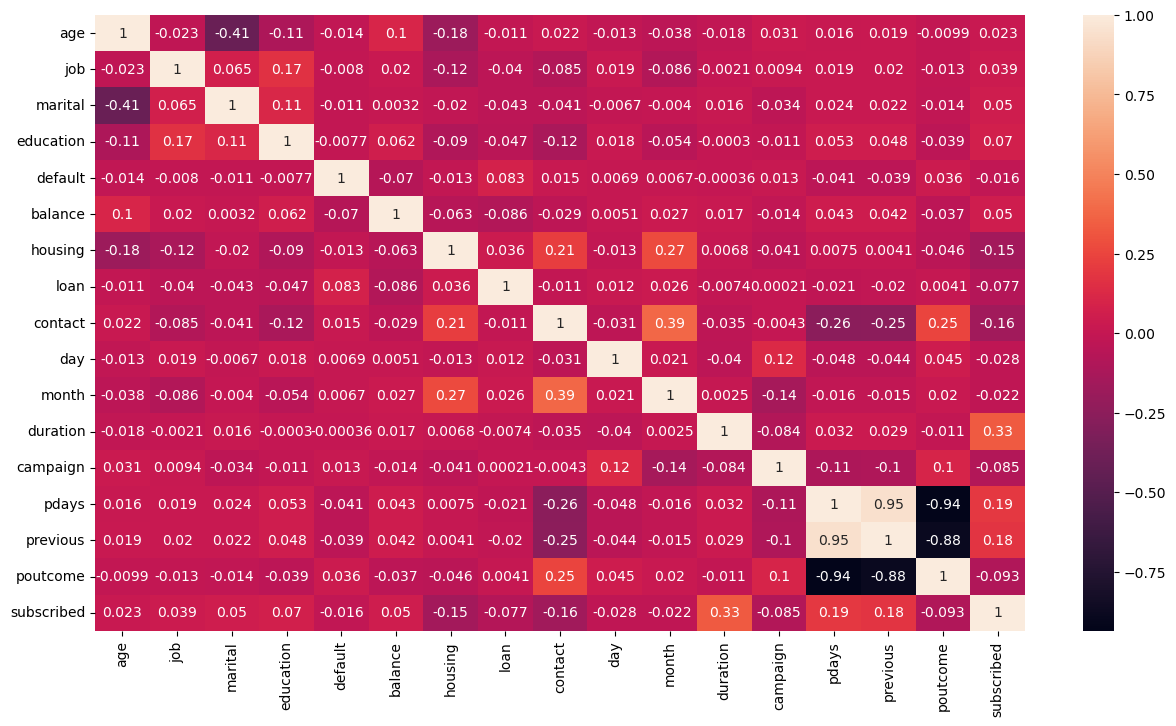

In [68]:
cor=df.corr()
fig= plt.figure(figsize=(15,8))
sns.heatmap(cor,annot = True)

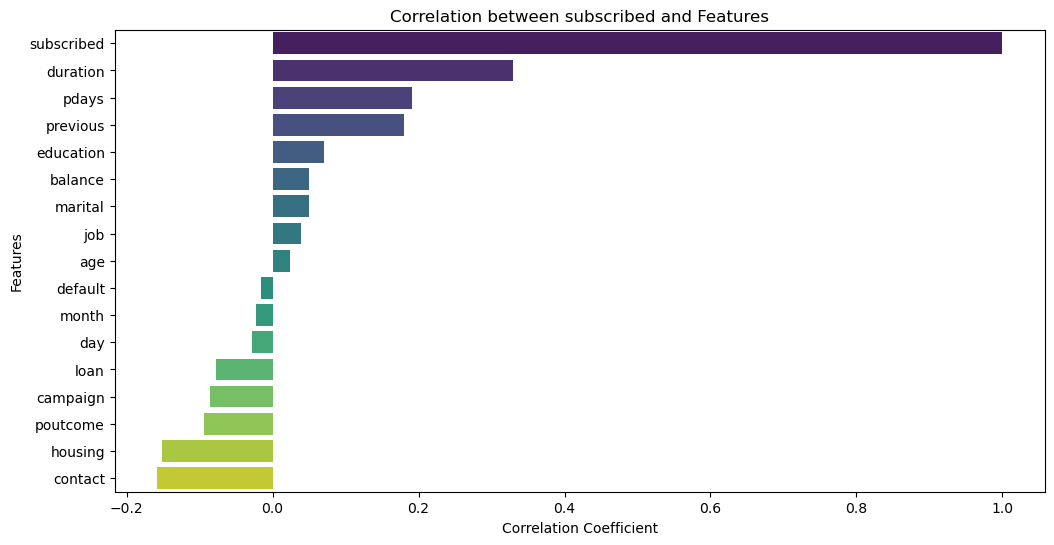

In [69]:
correlation_with_target = df.corr()['subscribed'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.title(f'Correlation between subscribed and Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [70]:
x = df.drop("subscribed", axis=1) 
y=df["subscribed"]

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.403777,-1.332946,-0.271896,2.361607,-0.138219,0.183175,-1.092062,-0.441968,0.363930,0.375730,1.166626,-1.439647,0.126558,-0.406597,-1.858930e-14,0.380624
1,-0.942137,2.032645,-0.271896,-0.301840,-0.138219,-0.449592,-1.092062,-0.441968,-0.735364,0.495036,-0.166483,-0.819886,0.126558,-0.406597,-1.858930e-14,0.380624
2,-1.317484,0.808794,-0.271896,-0.301840,-0.138219,-0.158454,0.915699,-0.441968,-0.735364,0.256425,-0.166483,0.279580,-1.086063,-0.406597,-1.858930e-14,0.380624
3,1.497613,-0.109094,-1.924862,1.029883,-0.138219,0.627096,-1.092062,-0.441968,-0.735364,0.733647,0.166794,2.406713,-1.086063,2.462505,1.148318e-13,-0.759312
4,-0.942137,1.420720,-0.271896,-0.301840,-0.138219,-0.411561,0.915699,-0.441968,-0.735364,-1.413852,-0.833037,0.938477,-1.086063,-0.406597,-1.858930e-14,0.380624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28854,0.183901,-0.109094,1.381071,-0.301840,-0.138219,0.522509,-1.092062,-0.441968,1.463224,0.495036,0.166794,-1.710661,1.209164,-0.406597,-1.858930e-14,0.380624
28855,-0.379118,1.420720,1.381071,1.029883,-0.138219,-0.021409,-1.092062,-0.441968,1.463224,-1.175241,0.166794,1.178194,0.126558,-0.406597,-1.858930e-14,0.380624
28856,-1.129811,-0.109094,1.381071,1.029883,-0.138219,-0.450576,0.915699,-0.441968,-0.735364,-0.459408,0.833349,-0.577092,0.126558,-0.406597,-1.858930e-14,0.380624
28857,1.122267,-0.109094,-1.924862,1.029883,-0.138219,-0.325990,-1.092062,2.262605,-0.735364,-1.294547,0.166794,1.163431,0.126558,-0.406597,-1.858930e-14,0.380624


In [72]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

     Variable         VIF
0         age    1.285583
1         job    1.048456
2     marital    1.226215
3   education    1.068358
4     default    1.013297
5     balance    1.034701
6     housing    1.183042
7        loan    1.022326
8     contact    1.320203
9         day    1.024075
10      month    1.270961
11   duration    1.013162
12   campaign    1.056906
13      pdays  722.744810
14   previous  713.328461
15   poutcome    8.240691


There is multicollearity so we will remove column with the highest vif value i.e. pdays.

In [76]:
x.drop('pdays',axis=1,inplace=True)

In [77]:
vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

     Variable       VIF
0         age  1.285310
1         job  1.048452
2     marital  1.226214
3   education  1.068351
4     default  1.013289
5     balance  1.034585
6     housing  1.183031
7        loan  1.022308
8     contact  1.320044
9         day  1.024075
10      month  1.270875
11   duration  1.013092
12   campaign  1.056613
13   previous  8.200735
14   poutcome  8.127573


We hace removed multicollinearity.

In [89]:
# Checking for best random state and accuracy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

best_RS = None
best_accuracy = 0.0

for i in range(1,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    model = RandomForestClassifier()

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_RS = i

print(f'Best Random State: {best_RS}')
print(f'Best Accuracy: {best_accuracy:.2f}')

Best Random State: 17
Best Accuracy: 0.92


In [90]:
#splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_RS)

In [91]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score 
from sklearn.model_selection import cross_val_score

Results for LogisticRegression:
Accuracy:  0.9003234003234003
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      7785
         1.0       0.52      0.19      0.27       873

    accuracy                           0.90      8658
   macro avg       0.72      0.58      0.61      8658
weighted avg       0.87      0.90      0.88      8658

Confusion Matrix:
 [[7633  152]
 [ 711  162]]
Cross-validation scores: [0.89864865 0.89760915 0.89760915 0.89691615 0.89707156]
Mean Cross-validation score: 0.8975709311006487
Difference between Accuracy and cross-validation score is 0.275246922275163


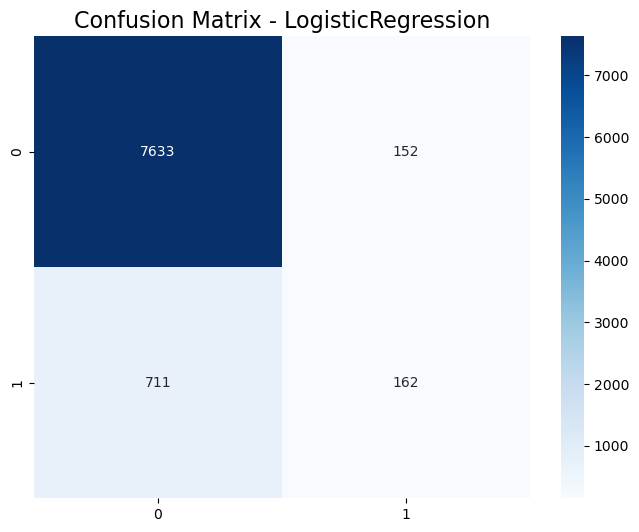



Results for RandomForestClassifier:
Accuracy:  0.9122199122199122
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      7785
         1.0       0.63      0.31      0.42       873

    accuracy                           0.91      8658
   macro avg       0.78      0.65      0.69      8658
weighted avg       0.90      0.91      0.90      8658

Confusion Matrix:
 [[7624  161]
 [ 599  274]]
Cross-validation scores: [0.91164241 0.90973666 0.90973666 0.90869716 0.90798822]
Mean Cross-validation score: 0.9095602213519385
Difference between Accuracy and cross-validation score is 0.2659690867973685


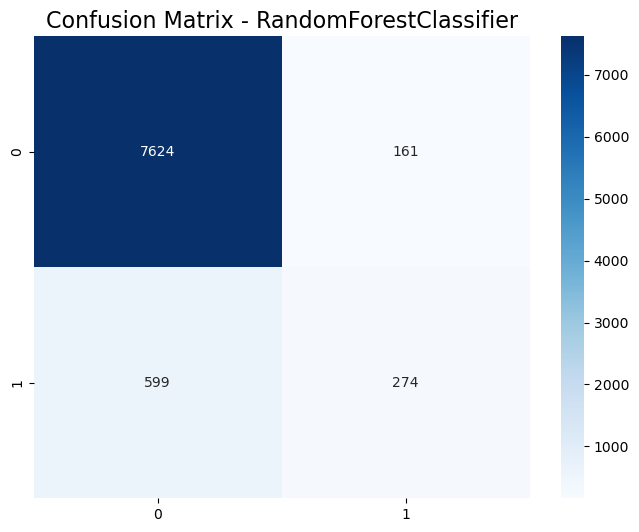



Results for DecisionTreeClassifier:
Accuracy:  0.8774543774543775
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      7785
         1.0       0.40      0.45      0.42       873

    accuracy                           0.88      8658
   macro avg       0.67      0.69      0.68      8658
weighted avg       0.88      0.88      0.88      8658

Confusion Matrix:
 [[7207  578]
 [ 483  390]]
Cross-validation scores: [0.88063063 0.88322938 0.87820513 0.87595288 0.88043667]
Mean Cross-validation score: 0.8796909368214167
Difference between Accuracy and cross-validation score is -0.22365593670392592


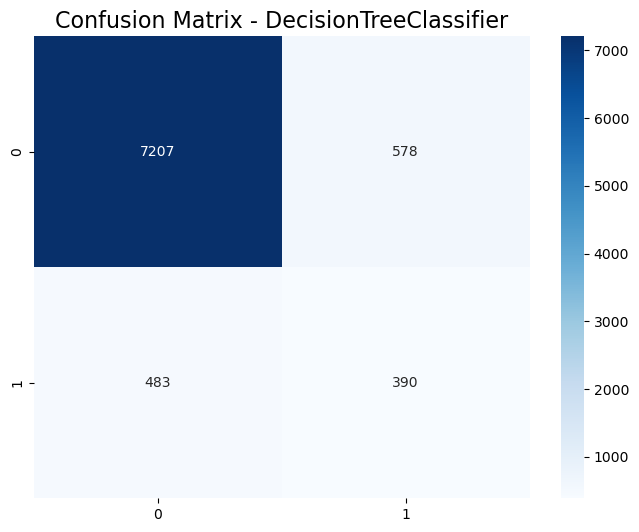



Results for SVC:
Accuracy:  0.9078309078309078
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      7785
         1.0       0.68      0.16      0.26       873

    accuracy                           0.91      8658
   macro avg       0.80      0.58      0.61      8658
weighted avg       0.89      0.91      0.88      8658

Confusion Matrix:
 [[7717   68]
 [ 730  143]]
Cross-validation scores: [0.9036729  0.9043659  0.9040194  0.90540541 0.90209669]
Mean Cross-validation score: 0.9039120615623821
Difference between Accuracy and cross-validation score is 0.39188462685256775


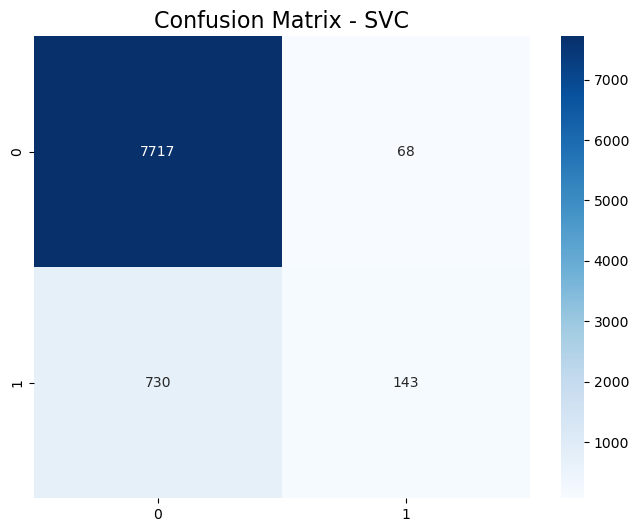



Results for GradientBoostingClassifier:
Accuracy:  0.9146454146454146
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      7785
         1.0       0.65      0.34      0.44       873

    accuracy                           0.91      8658
   macro avg       0.79      0.66      0.70      8658
weighted avg       0.90      0.91      0.90      8658

Confusion Matrix:
 [[7625  160]
 [ 579  294]]
Cross-validation scores: [0.91042966 0.91094941 0.90835066 0.91302841 0.90833478]
Mean Cross-validation score: 0.9102185840186188
Difference between Accuracy and cross-validation score is 0.442683062679583


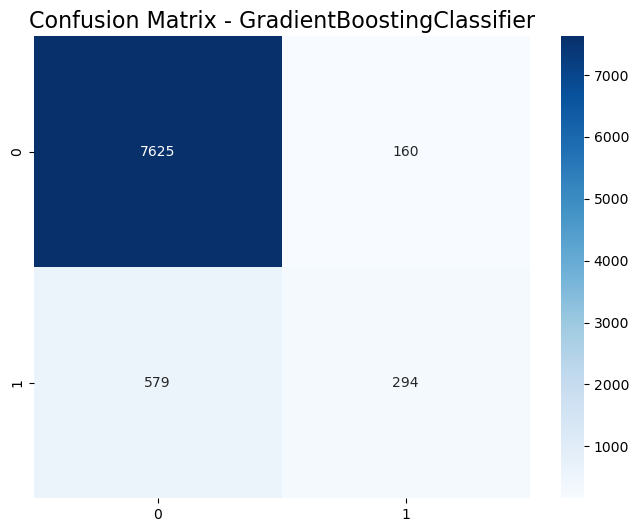



Results for AdaBoostClassifier:
Accuracy:  0.9093324093324093
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      7785
         1.0       0.59      0.33      0.42       873

    accuracy                           0.91      8658
   macro avg       0.76      0.65      0.69      8658
weighted avg       0.89      0.91      0.90      8658

Confusion Matrix:
 [[7585  200]
 [ 585  288]]
Cross-validation scores: [0.9026334  0.90627166 0.90142065 0.90609841 0.90469589]
Mean Cross-validation score: 0.9042240019367034
Difference between Accuracy and cross-validation score is 0.510840739570595


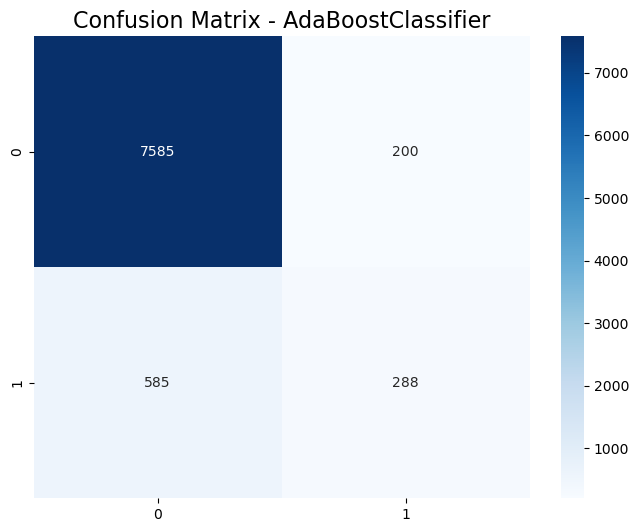



Results for ExtraTreesClassifier:
Accuracy:  0.9127974127974128
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7785
         1.0       0.66      0.28      0.39       873

    accuracy                           0.91      8658
   macro avg       0.79      0.63      0.67      8658
weighted avg       0.90      0.91      0.90      8658

Confusion Matrix:
 [[7659  126]
 [ 629  244]]
Cross-validation scores: [0.90852391 0.90713791 0.90627166 0.90887041 0.90556229]
Mean Cross-validation score: 0.90727323500673
Difference between Accuracy and cross-validation score is 0.5524177790682816


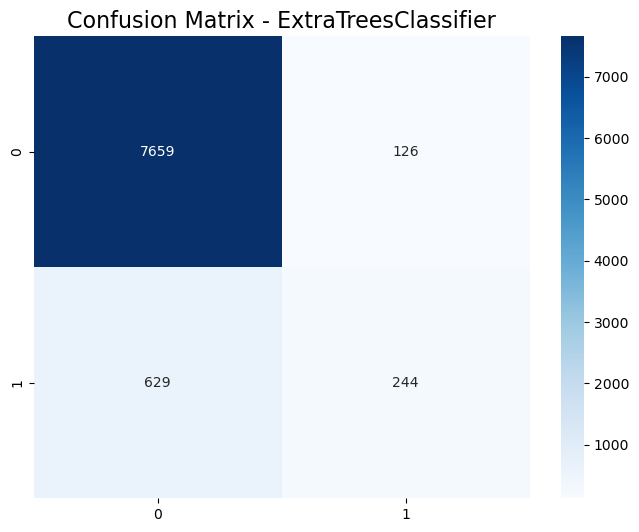

In [92]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Cross-validation
    score = cross_val_score(model, x, y, cv=5, scoring="accuracy")
    
    # Printing results
    print(f"Results for {model_name}:")
    print('Accuracy: ', accuracy)
    print('Classification Report:\n', classification_rep)
    print('Confusion Matrix:\n', conf_matrix)
    
    # Cross-validating scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between Accuracy and cross-validation score is", (accuracy - score.mean()) * 100)
    
    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}", fontsize=16)
    plt.show()
    
    print("\n" + "="*40 + "\n")


Random Forest Classifier is best model.

In [97]:
from sklearn.model_selection import GridSearchCV


params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [98]:
grid_search = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='accuracy')

In [99]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [100]:
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [101]:
best_model = grid_search.best_estimator_


# Making predictions on the test set using the best model
y_pred = best_model.predict(x_test)

# Evaluating the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Displaying classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      7785
         1.0       0.62      0.31      0.42       873

    accuracy                           0.91      8658
   macro avg       0.77      0.65      0.68      8658
weighted avg       0.90      0.91      0.90      8658



In [105]:
#Saving the model using .pkl
import joblib
joblib.dump(best_model, "bank_marketing.pkl")

['bank_marketing.pkl']

In [107]:
# loading the saved model and getting the predictions
model=joblib.load("Glass_type_Prediction.pkl")

In [151]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [152]:
test_data.drop('ID',axis=1, inplace=True)

In [153]:
test_data.drop('pdays',axis=1, inplace=True)

In [154]:
numerical_col = test_data.select_dtypes(exclude=['object']).columns
numerical_col

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous'], dtype='object')

In [156]:
from scipy.stats import zscore

out_col = test_data[['duration','campaign','previous']]
z = np.abs(zscore(out_col))
np.where(z>3)

(array([   15,    52,    53,    90,   102,   117,   131,   136,   140,
          157,   169,   228,   248,   258,   259,   270,   278,   307,
          323,   351,   353,   380,   383,   388,   432,   437,   453,
          475,   478,   489,   515,   520,   521,   547,   558,   566,
          598,   668,   668,   677,   704,   709,   748,   763,   770,
          809,   864,   889,   903,   936,   972,   982,   994,  1033,
         1042,  1048,  1049,  1062,  1086,  1093,  1103,  1113,  1122,
         1136,  1148,  1167,  1206,  1208,  1241,  1257,  1257,  1259,
         1272,  1289,  1319,  1322,  1354,  1358,  1368,  1374,  1377,
         1394,  1407,  1413,  1445,  1465,  1473,  1515,  1526,  1530,
         1533,  1534,  1538,  1548,  1571,  1587,  1623,  1633,  1675,
         1677,  1683,  1693,  1725,  1743,  1763,  1766,  1768,  1798,
         1815,  1820,  1852,  1874,  1916,  1929,  1967,  1972,  1978,
         1988,  2011,  2014,  2028,  2030,  2043,  2046,  2052,  2072,
      

In [157]:
test_data.shape

(13564, 15)

In [158]:
test_data = test_data[(z<3).all(axis=1)]
test_data.shape

(12745, 15)

In [159]:
test_data.skew()

age         0.673778
balance     9.246027
day         0.117262
duration    1.581333
campaign    1.972303
previous    3.056154
dtype: float64

In [160]:
df2 = test_data.copy()

In [161]:
skewed_columns = ['duration', 'previous','campaign']

for column in skewed_columns:
    df2[column] = np.cbrt(df2[column])

In [162]:
df2.skew()

age         0.673778
balance     9.246027
day         0.117262
duration    0.272310
campaign    0.970927
previous    1.892428
dtype: float64

In [163]:
skewed_columns = ['campaign', 'previous']

for column in skewed_columns:
    df2[column] = np.sqrt(df2[column])

In [164]:
df2.skew()

age         0.673778
balance     9.246027
day         0.117262
duration    0.272310
campaign    0.768434
previous    1.750889
dtype: float64

In [165]:
skewed_columns = ['campaign', 'previous']

for column in skewed_columns:
    df2[column] = np.exp(df2[column])

In [166]:
df2.skew()

age         0.673778
balance     9.246027
day         0.117262
duration    0.272310
campaign    1.015211
previous    1.838243
dtype: float64

In [167]:
skewed_columns = ['campaign', 'previous']

for column in skewed_columns:
    df2[column] = np.log1p(df2[column])

In [168]:
df2.skew()

age         0.673778
balance     9.246027
day         0.117262
duration    0.272310
campaign    0.822292
previous    1.771039
dtype: float64

In [169]:
from scipy.stats import boxcox

# Applying Box-Cox transformation
skewed_columns = ['campaign', 'previous']

for column in skewed_columns:
    df2[column], _ = boxcox(df2[column] + 1)

In [170]:
df2.skew()

age         0.673778
balance     9.246027
day         0.117262
duration    0.272310
campaign    0.179562
previous    1.703321
dtype: float64

In [171]:
from scipy.stats import yeojohnson

# Applying Yeo-Johnson transformation
df2['previous'], _ = yeojohnson(df2['previous'] + 1)

In [172]:
df2.skew()

age         0.673778
balance     9.246027
day         0.117262
duration    0.272310
campaign    0.179562
previous    0.000000
dtype: float64

In [173]:
test_data = df2

In [174]:
# Encoding categorical columns using OrdinalEncoder 
OE = OrdinalEncoder()
for i in test_data.columns:
    if test_data[i].dtypes == 'object':
        test_data[i] = OE.fit_transform (test_data[i].values.reshape(-1, 1))
test_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,2.714418,0.094670,0.033002,3.0
1,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,7.191966,0.094661,0.033002,3.0
2,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,8.776383,0.094661,0.033002,3.0
3,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,4.020726,0.094666,0.033002,3.0
4,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,4.805896,0.094661,0.033002,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,5.289572,0.094669,0.033002,3.0
13560,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,5.406120,0.094661,0.033002,3.0
13561,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,5.142563,0.094661,0.033002,3.0
13562,29,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,5.924992,0.094666,0.033002,2.0


In [175]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,1.403777,-1.332946,-0.271896,2.361607,-0.138219,0.183175,-1.092062,-0.441968,0.363930,0.375730,1.166626,-1.439647,0.126558,-0.406630,0.380624
1,-0.942137,2.032645,-0.271896,-0.301840,-0.138219,-0.449592,-1.092062,-0.441968,-0.735364,0.495036,-0.166483,-0.819886,0.126558,-0.406630,0.380624
2,-1.317484,0.808794,-0.271896,-0.301840,-0.138219,-0.158454,0.915699,-0.441968,-0.735364,0.256425,-0.166483,0.279580,-1.086063,-0.406630,0.380624
3,1.497613,-0.109094,-1.924862,1.029883,-0.138219,0.627096,-1.092062,-0.441968,-0.735364,0.733647,0.166794,2.406713,-1.086063,2.510131,-0.759312
4,-0.942137,1.420720,-0.271896,-0.301840,-0.138219,-0.411561,0.915699,-0.441968,-0.735364,-1.413852,-0.833037,0.938477,-1.086063,-0.406630,0.380624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28854,0.183901,-0.109094,1.381071,-0.301840,-0.138219,0.522509,-1.092062,-0.441968,1.463224,0.495036,0.166794,-1.710661,1.209164,-0.406630,0.380624
28855,-0.379118,1.420720,1.381071,1.029883,-0.138219,-0.021409,-1.092062,-0.441968,1.463224,-1.175241,0.166794,1.178194,0.126558,-0.406630,0.380624
28856,-1.129811,-0.109094,1.381071,1.029883,-0.138219,-0.450576,0.915699,-0.441968,-0.735364,-0.459408,0.833349,-0.577092,0.126558,-0.406630,0.380624
28857,1.122267,-0.109094,-1.924862,1.029883,-0.138219,-0.325990,-1.092062,2.262605,-0.735364,-1.294547,0.166794,1.163431,0.126558,-0.406630,0.380624


In [176]:
vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

     Variable       VIF
0         age  1.285310
1         job  1.048452
2     marital  1.226214
3   education  1.068351
4     default  1.013289
5     balance  1.034585
6     housing  1.183032
7        loan  1.022308
8     contact  1.320044
9         day  1.024075
10      month  1.270875
11   duration  1.013092
12   campaign  1.056613
13   previous  8.200738
14   poutcome  8.127577


We have done all the preprocessign steps to test data as well and now we can  Use the trained model to predict whether a new set of clients will subscribe the term deposit for test data.

In [178]:
y_pred = best_model.predict(test_data)

# Displaying the predictions
print("Predictions:", np.array(y_pred))

Predictions: [1. 1. 1. ... 1. 1. 1.]
